## Data Cleaning

Unbalanced Sentiment Values: negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64
AIRLINES ['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']
RANDOM VALUES: Positive =  2363 Negative= 9178 Neutal= 3099
A balanced * BalancedUncleanFile.csv * file created
sentimentValues: negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64
done


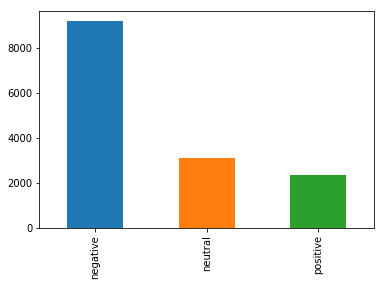

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score, log_loss

# import warnings filter
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import import_ipynb
import data


data.createBalancedFile()
array = data.dataCleaning();
tweetsData = array[0]
sentiment = array[1]

print('done')

## Splitting DataSet for Training and Testing

In [2]:
#Splitting DataSet for Training and Testing
from sklearn.model_selection import train_test_split

targetSentiment = ["positive", "negative","neutral"]

X_train, X_test, Y_train, Y_test = train_test_split(tweetsData, sentiment, test_size =0.3)

print('Splitting Data complete')


Splitting Data complete


In [3]:
#---Text Feature Extraction, Bag of Words-----  
#Count Vectorizer ignores uni-character words as it has no information

countVector = CountVectorizer() 
termCountMatrix = countVector.fit_transform(X_train)
print("running")
print("SHAPE:"+ str(termCountMatrix.shape)) #3 documents and 7 unique terms/vocab

#TFIDF
# tfIdfTransformer = TfidfTransformer()
# tdIdfMatrix = tfIdfTransformer.fit_transform(termCountMatrix)

#print("TFIDF:" + str(tfIdfTransformer.idf_))
# print("TFIDF:" + str(tdIdfMatrix.toarray()))

# #------Training NB Model-----
# model = MultinomialNB().fit(tdIdfMatrix,Y_train)

# #------Testing NB Model-----
# XTestVectorMatrix = countVector.transform(X_test)
# XTestTFMatrix =  tfIdfTransformer.transform(XTestVectorMatrix)
# predicted = model.predict(XTestTFMatrix)
# print("PREDICT",predicted)

# accuracy = metrics.accuracy_score(Y_test,predicted)
# print("accuracy:", accuracy)
# print(metrics.classification_report(Y_test, predicted, targetSentiment))


running
SHAPE:(10248, 11094)


## Vectorization of Training and testing data

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(min_df =2, max_df=0.5, ngram_range=(1,2))
vectorizer = TfidfVectorizer(ngram_range=(1,1))
features = vectorizer.fit_transform(X_train)
feature_names = vectorizer.get_feature_names()
# print(features_names)

In [5]:
testFeatures = vectorizer.transform(X_test)
print('done')

done


## Classifiers without Feature Selection 

In [6]:
#All Classifiers
def classifiers(X_train, Y_train, X_test,Y_test):

    from sklearn.metrics import accuracy_score, log_loss
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    # import warnings filter
    from warnings import simplefilter
    simplefilter(action='ignore', category=FutureWarning)
    
    accList =[]
    clfNameList = []
    

    classifiers = [
        MultinomialNB(),
        SVC(kernel="rbf", C=0.025, probability=True),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        LogisticRegression(random_state=0)]

    evaluationArr =["Classifier", "Accuracy"]
    log = pd.DataFrame(columns=evaluationArr)

    for clf in classifiers:
        clf.fit(X_train, Y_train)
        clfName = clf.__class__.__name__
        print(clfName)
        clfNameList.append(clfName)

        predicted = clf.predict(X_test)
        accuracy = accuracy_score(Y_test, predicted)
        print("Accuracy: {:.4%}".format(accuracy))
        accList.append(accuracy)
        print(metrics.classification_report(Y_test, predicted, targetSentiment))
        print("="*30)

    #     train_predictions = clf.predict_proba(X_test)[:,3]
    #     ll = log_loss(Y_test, train_predictions)
    #     print("Log Loss: {}".format(ll))

        modelResult = pd.DataFrame([[clfName, accuracy*100]], columns=evaluationArr)
        log = log.append(modelResult)
        
    

    sns.set_color_codes("muted")
    sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

    plt.xlabel('Accuracy %')
    plt.title('Classifier Accuracy')
    plt.show()

MultinomialNB
Accuracy: 67.0612%
              precision    recall  f1-score   support

    positive       0.89      0.12      0.21       690
    negative       0.66      1.00      0.79      2773
     neutral       0.85      0.10      0.19       930

   micro avg       0.67      0.67      0.67      4393
   macro avg       0.80      0.41      0.40      4393
weighted avg       0.74      0.67      0.57      4393

SVC
Accuracy: 63.1232%
              precision    recall  f1-score   support

    positive       0.00      0.00      0.00       690
    negative       0.63      1.00      0.77      2773
     neutral       0.00      0.00      0.00       930

   micro avg       0.63      0.63      0.63      4393
   macro avg       0.21      0.33      0.26      4393
weighted avg       0.40      0.63      0.49      4393



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


DecisionTreeClassifier
Accuracy: 67.0157%
              precision    recall  f1-score   support

    positive       0.55      0.54      0.54       690
    negative       0.78      0.78      0.78      2773
     neutral       0.43      0.45      0.44       930

   micro avg       0.67      0.67      0.67      4393
   macro avg       0.59      0.59      0.59      4393
weighted avg       0.67      0.67      0.67      4393

RandomForestClassifier
Accuracy: 72.7521%
              precision    recall  f1-score   support

    positive       0.73      0.37      0.49       690
    negative       0.74      0.94      0.83      2773
     neutral       0.62      0.36      0.46       930

   micro avg       0.73      0.73      0.73      4393
   macro avg       0.70      0.56      0.59      4393
weighted avg       0.72      0.73      0.70      4393

LogisticRegression
Accuracy: 78.5568%
              precision    recall  f1-score   support

    positive       0.83      0.54      0.65       690
    neg

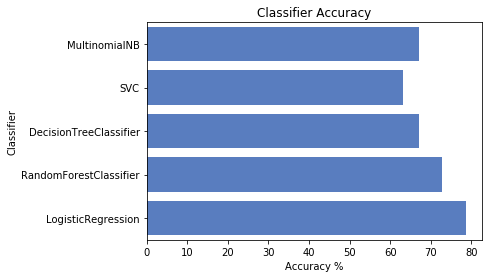

In [7]:
classifiers(features, Y_train, testFeatures,Y_test);

## Feature Selection: SelectKBest

In [8]:
#---Feature selection - selectKbest----
def selectKbest(Kvalue, feature_names,  X_train, Y_train, X_test, Y_test): 
   
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2
    print("SHAPE: feature:"+ str(X_train.shape) + "featureTest:" + str(X_test.shape))

    ch2 = SelectKBest(chi2, k =  Kvalue)
    X_train = ch2.fit_transform(X_train, Y_train)
    X_test = ch2.transform(X_test);

    selected_feature_names = [feature_names[i] for i in ch2.get_support(indices=True)]
#     print(selected_feature_names);
    print("SELECT K BEST, feature:"+ str(X_train.shape) + "featureTest:" + str(X_test.shape))
    
    return [X_train, X_test]

SHAPE: feature:(10248, 11094)featureTest:(4393, 11094)
SELECT K BEST, feature:(10248, 1000)featureTest:(4393, 1000)
MultinomialNB
Accuracy: 70.8855%
              precision    recall  f1-score   support

    positive       0.86      0.27      0.41       690
    negative       0.70      0.99      0.82      2773
     neutral       0.75      0.19      0.31       930

   micro avg       0.71      0.71      0.71      4393
   macro avg       0.77      0.48      0.51      4393
weighted avg       0.73      0.71      0.65      4393

SVC
Accuracy: 63.1232%
              precision    recall  f1-score   support

    positive       0.00      0.00      0.00       690
    negative       0.63      1.00      0.77      2773
     neutral       0.00      0.00      0.00       930

   micro avg       0.63      0.63      0.63      4393
   macro avg       0.21      0.33      0.26      4393
weighted avg       0.40      0.63      0.49      4393



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


DecisionTreeClassifier
Accuracy: 65.9686%
              precision    recall  f1-score   support

    positive       0.53      0.52      0.52       690
    negative       0.78      0.77      0.77      2773
     neutral       0.42      0.45      0.43       930

   micro avg       0.66      0.66      0.66      4393
   macro avg       0.58      0.58      0.58      4393
weighted avg       0.66      0.66      0.66      4393

RandomForestClassifier
Accuracy: 72.6838%
              precision    recall  f1-score   support

    positive       0.70      0.44      0.54       690
    negative       0.76      0.92      0.83      2773
     neutral       0.58      0.37      0.45       930

   micro avg       0.73      0.73      0.73      4393
   macro avg       0.68      0.58      0.61      4393
weighted avg       0.71      0.73      0.70      4393

LogisticRegression
Accuracy: 77.4186%
              precision    recall  f1-score   support

    positive       0.81      0.51      0.63       690
    neg

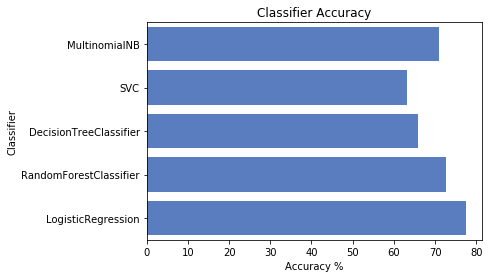

In [9]:
#SelectKBest Testing with Different classifiers
array = selectKbest(1000,feature_names, features, Y_train, testFeatures, Y_test)
X_train = array[0]
X_test = array[1]

classifiers(X_train, Y_train, X_test,Y_test);

## Feature Selection : SelectFromModel 

In [10]:
def selectFromModel( classifier, X_train, Y_train, X_test,Y_test ):

    from sklearn.pipeline import Pipeline
    from sklearn.feature_selection import SelectFromModel

    clf = Pipeline([
      ('feature_selection', SelectFromModel(MultinomialNB())),
      ('classification', classifier)
    ])
    
    model = clf.fit(X_train, Y_train);
    print("==========/n")
    print("Classifier: ", classifier.__class__.__name__)
    prediction = model.predict(X_test)
#     print(prediction)
    accuracy = accuracy_score(Y_test, prediction)
    print("Accuracy: {:.4%}".format(accuracy))

In [13]:
from sklearn.svm import SVC
selectFromModel(SVC(kernel="rbf", C=0.025, probability=True), X_train, Y_train, X_test,Y_test)
selectFromModel(LinearSVC(), X_train, Y_train, X_test,Y_test)
selectFromModel( MultinomialNB(), X_train, Y_train, X_test,Y_test)
selectFromModel(DecisionTreeClassifier(), X_train, Y_train, X_test,Y_test)
selectFromModel( RandomForestClassifier(), X_train, Y_train, X_test,Y_test)
selectFromModel(LogisticRegression(random_state=0), X_train, Y_train, X_test,Y_test)

==========/n
Classifier:  SVC
Accuracy: 63.1232%
==========/n
Classifier:  LinearSVC
Accuracy: 66.3100%
==========/n
Classifier:  MultinomialNB
Accuracy: 63.5329%
==========/n
Classifier:  DecisionTreeClassifier
Accuracy: 65.1036%
==========/n
Classifier:  RandomForestClassifier
Accuracy: 65.3540%
==========/n
Classifier:  LogisticRegression
Accuracy: 63.8516%


In [ ]:
# ConMetrics = metrics.confusion_matrix(Y_test,predicted,targetSentiment)
# print(ConMetrics)
# import matplotlib.pyplot as plt
# import seaborn as sns; sns.set()

# sns.heatmap(ConMetrics.T, annot=True, fmt='d', xticklabels= targetSentiment, yticklabels= targetSentiment)
# plt.xlabel('true label')
# plt.ylabel('predicted label')


In [ ]:
# ----Training the model And Testing---
pipeline = Pipeline([
    ('vectorizer',  TfidfVectorizer(ngram_range=(1,1))),
    ('classifier',  MultinomialNB()) ])

pipeline.fit(X_train, Y_train)
accuracy = metrics.accuracy_score(Y_test,predicted)
print("accuracy:", accuracy)
print(metrics.classification_report(Y_test, predicted, targetSentiment))